## Lab introduction: numerical differentiation and error behavior

### 1) Goal
The goal is to approximate numerically the derivative $f'(x_0)$ using several methods, and study the absolute error behaviour
$$
|D(h) - f'(x_0)|
$$
that depends on the step size $h$. For each test function we compare the numerical derivative $D(h)$ with the exact derivative and plot the error on log–log axes

---

### 2) Derivation of the formulas

All formulas come from Taylor expansions of $f$ around $x_0$. For small $h$,
$$
f(x_0+h)=f(x_0)+h f'(x_0)+\frac{h^2}{2}f''(x_0)+\frac{h^3}{6}f^{(3)}(x_0)+\frac{h^4}{24}f^{(4)}(x_0)+O(h^5),
$$
$$
f(x_0-h)=f(x_0)-h f'(x_0)+\frac{h^2}{2}f''(x_0)-\frac{h^3}{6}f^{(3)}(x_0)+\frac{h^4}{24}f^{(4)}(x_0)+O(h^5).
$$

#### Forward difference (1st order)
Start from $f(x_0+h)-f(x_0)$:
$$
f(x_0+h)-f(x_0)=h f'(x_0)+\frac{h^2}{2}f''(x_0)+O(h^3).
$$
Divide by $h$:
$$
\frac{f(x_0+h)-f(x_0)}{h}=f'(x_0)+\frac{h}{2}f''(x_0)+O(h^2).
$$
So the truncation error is $O(h)$.

#### Backward difference (1st order)
Similarly, from $f(x_0)-f(x_0-h)$:
$$
f(x_0)-f(x_0-h)=h f'(x_0)+\frac{h^2}{2}f''(x_0)+O(h^3),
$$
Divide by $h$:
$$
\frac{f(x_0)-f(x_0-h)}{h}=f'(x_0)+\frac{h}{2}f''(x_0)+O(h^2).
$$
Again truncation error $O(h)$.

#### Central difference (2nd order)
Subtract the two Taylor series:
$$
f(x_0+h)-f(x_0-h)=2h f'(x_0)+\frac{h^3}{3}f^{(3)}(x_0)+O(h^5).
$$
Divide by $2h$:
$$
\frac{f(x_0+h)-f(x_0-h)}{2h}=f'(x_0)+\frac{h^2}{6}f^{(3)}(x_0)+O(h^4).
$$
Now the truncation error is $O(h^2)$

#### Central difference (4th order)
Consider the symmetric differences at steps $h$ and $2h$:
$$
\delta(h)=f(x_0+h)-f(x_0-h)=2h f'(x_0)+\frac{h^3}{3}f^{(3)}(x_0)+\frac{h^5}{60}f^{(5)}(x_0)+O(h^7),
$$
$$
\delta(2h)=f(x_0+2h)-f(x_0-2h)=4h f'(x_0)+\frac{8h^3}{3}f^{(3)}(x_0)+\frac{8h^5}{15}f^{(5)}(x_0)+O(h^7).
$$
We choose constants $A,B$ so that $A\delta(h)+B\delta(2h)$ keeps the $f'(x_0)$ term but cancels the $f^{(3)}(x_0)$ term:
$$
A\left(\frac{1}{3}\right)+B\left(\frac{8}{3}\right)=0 \;\Rightarrow\; A=-8B.
$$
Taking $B=-\frac{1}{2}$ gives $A=4$. Then
$$
4\delta(h)-\frac{1}{2}\delta(2h)=6h f'(x_0)+O(h^5).
$$
Divide by $6h$:
$$
\frac{4\big(f(x_0+h)-f(x_0-h)\big)-\frac{1}{2}\big(f(x_0+2h)-f(x_0-2h)\big)}{6h}
= f'(x_0) + O(h^4).
$$
So truncation error is $O(h^4)$.

---

### 3) Why the error curves are U-shaped
The total error has two main contributions:

1. **Truncation error (Taylor remainder):** decreasing $h$ improves the approximation. For a method of order $p$,
$$
\text{truncation} \approx C_1 h^p \quad (p=1,2,4,\dots)
$$

2. **Floating-point rounding and cancellation:** when $h$ is extremely small, expressions like $f(x_0+h)-f(x_0)$ subtract nearly equal numbers, causing loss of significant digits. This produces an error that typically behaves like
$$
\text{rounding} \approx C_2\frac{\varepsilon}{h},
$$

Therefore,
$$
\text{total error}(h)\approx C_1 h^p + C_2\frac{\varepsilon}{h}.
$$

---

### 4) V-shaped anamolies

In several plots a sharp V-shaped dip appears around $ h \approx 0.5$. This happens because we plot the absolute error ($|e(h)|$) and in those points $e(h)$ simply crosses zero

In [14]:
import numpy as np
import matplotlib.pyplot as plt

x0 = 1.0

h = 2 ** np.linspace(-21, 0, 1000)

In [15]:
funcs = {
    r"$\sin(x^2)$": (
        lambda x: np.sin(x**2),
        lambda x: 2*x*np.cos(x**2),
    ),
    r"$\cos(\sin x)$": (
        lambda x: np.cos(np.sin(x)),
        lambda x: -np.sin(np.sin(x))*np.cos(x),
    ),
    r"$\exp(\sin(\cos x))$": (
        lambda x: np.exp(np.sin(np.cos(x))),
        lambda x: np.exp(np.sin(np.cos(x))) * np.cos(np.cos(x)) * (-np.sin(x)),
    ),
    r"$\log(x+3)$": (
        lambda x: np.log(x + 3),
        lambda x: 1/(x + 3),
    ),
    r"$(x+3)^{1/2}$": (
        lambda x: np.sqrt(x + 3),
        lambda x: 1/(2*np.sqrt(x + 3)),
    ),
}

methods = {
    "Forward (1st)":  lambda f, x, h: (f(x + h) - f(x)) / h,
    "Backward (1st)": lambda f, x, h: (f(x) - f(x - h)) / h,
    "Central (2nd)":  lambda f, x, h: (f(x + h) - f(x - h)) / (2*h),
    "Central (4th)":  lambda f, x, h: (4*(f(x + h) - f(x - h)) - 0.5*(f(x + 2*h) - f(x - 2*h))) / (6*h),
    "Central (6th)":  lambda f, x, h: ((3/2) * (f(x + h) - f(x - h)) / (2*h) - (3/5) * (f(x + 2*h) - f(x - 2*h)) / (4*h) + (1/10) * (f(x + 3*h) - f(x - 3*h)) / (6*h)),
}

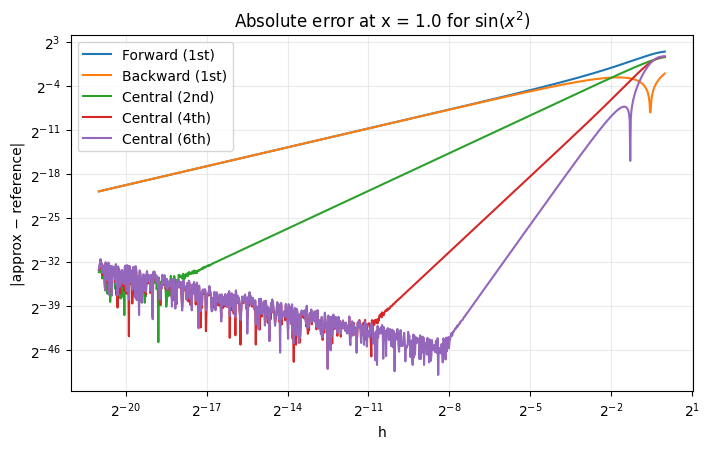

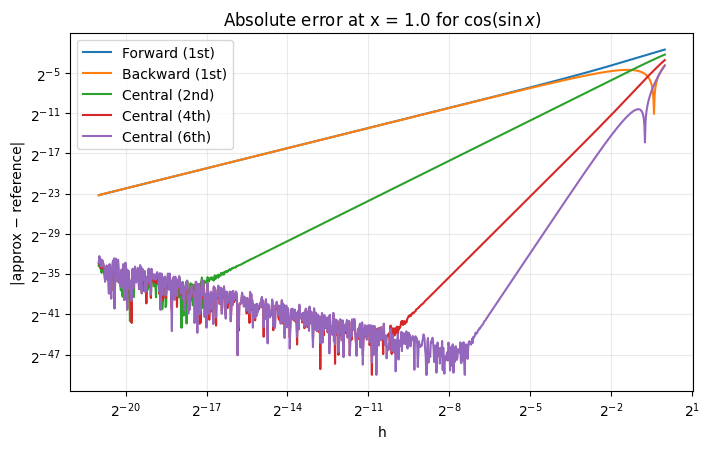

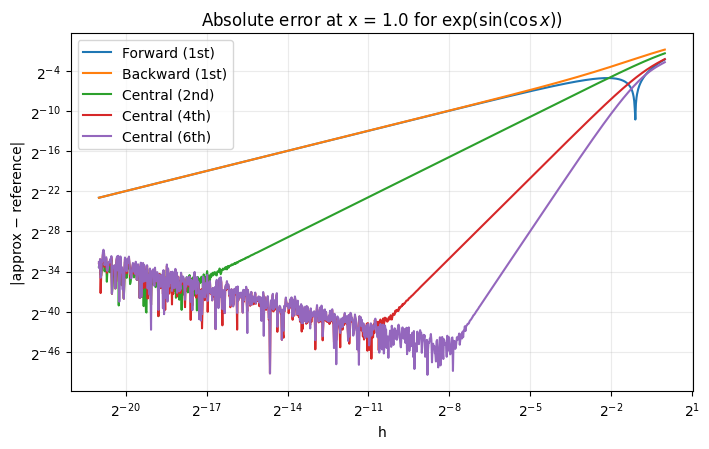

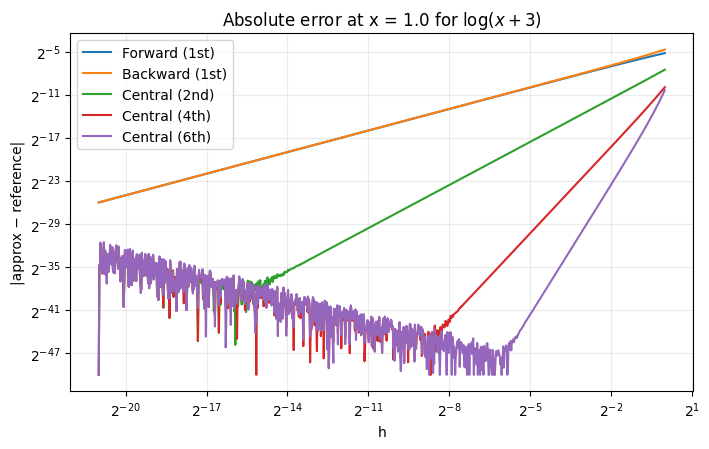

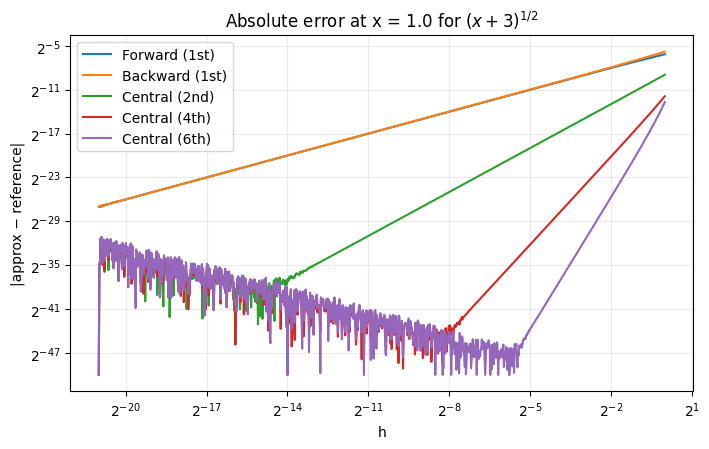

In [16]:
for title, (f, df) in funcs.items():
    true = df(x0)

    plt.figure(figsize=(7.2, 4.6))
    for name, approx in methods.items():
        est = approx(f, x0, h)
        err = np.abs(est - true)
        err = np.maximum(err, 2**-50)
        plt.plot(h, err, label=name)

    plt.title(f"Absolute error at x = {x0} for {title}")
    plt.xscale("log", base=2)
    plt.yscale("log", base=2)
    plt.xlabel("h")
    plt.ylabel("|approx − reference|")
    plt.grid(True, which="both", alpha=0.25)
    plt.legend()
    plt.tight_layout()
    plt.show()